## **Programming for Data Science - Lập Trình cho khoa học dữ liệu**
### **HCMUS - Trường Đại học khoa học tự nhiên - Nov 2024.**
### **Final Project - Handle Kaggle Dataset Problems**
#### **Due:** 16/12/2024.
#### **Lớp:** 22_21.
#### **Giảng viên hướng dẫn:** Thầy Phạm Trọng Nghĩa - Thầy Lê Nhựt Nam.
#### **Tên Nhóm:** 3TT
#### **MSSS - Tên thành viên:**
1. 22120384 - Nguyễn Đình Trí.
2. 22120398 - Vũ Hoàng Nhật Trường.
3. 22120412 - Nguyễn Anh Tường.
---
### STEP 2: DATA PREPROCESSING & NUMERICAL vs STATISTIC EXPLORATION
#### **Người thực hiện:** Nguyễn Anh Tường - 22120412.

---

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Data/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


**1. Kiểm tra kiểu dữ liệu của từng cột:**

In [3]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

**Nhận xét:**
* Các cột đã đúng với kiểu dữ liệu nên có.

**2. Kiểm tra các giá trị thiếu khuyết:**

In [4]:
print('Is NaN Check: ')
print(df.isna().sum())

Is NaN Check: 
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


**Nhận xét:**
* Như vậy không có dòng nào trong tập dữ liệu bị thiếu sót hoặc sai định dạng (NaN hoặc None).

**3. Kiểm tra điều kiện tồn tại của các cột:**

**Nhận xét:**

* Các cột như: `HeartDisease`, `Smoking`, `AlcoholDrinking`, `Stroke`, `DriffWalking`, `PhysicalActivity`, `Asthma`, `KidneyDisease`, `SkinCancer` có ý nghĩa là `có/không` ( có mắc hoặc không mắc hay có sử dụng hoặc không sử dụng,... ) vì thế các giá trị phải thuộc Yes/No. Ta cần kiểm tra xem trong các cột này có dòng nào tồn tại giá trị **nằm ngoài** giá trị `Yes` hoặc `No` hay không.

In [5]:
tf_df = df[['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']]
invalid_tf_df = tf_df[~tf_df.isin(["Yes", "No"]).all(axis=1)]
invalid_tf_df

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer


**Kết luận:** Như vậy không có dòng nào trong các cột này tồn tại giá trị khác `yes` hoặc `no`.

* Cột `Sex` thể hiện giới tính của bệnh nhân, giá trị có thể có là `Male` hoặc `Female`.

In [6]:
sex_label_df = df['Sex'].unique()
print(sex_label_df)

['Female' 'Male']


**Kết luận:** Như vậy không có giá trị nào nằm ngoài hai giá trị `Female` và `Male`.

* Các cột như `BMI`, `PhysicalHealth`, `MentalHealth`, `SleepTime` là những cột **chỉ số xác định tình trạng sức khỏe** của con người. Vì thế sẽ biến thiên tùy thuộc vào từng người. Nhưng điều kiện tiên quyết là giá trị của chúng **phải lớn hơn hoặc bằng 0.**

In [7]:
health_df = df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']]
invalid_healthscore_df = health_df[(health_df.values < 0).all(axis=1)]
invalid_healthscore_df

,BMI,PhysicalHealth,MentalHealth,SleepTime


**Kết luận:** Như vậy không có hàng nào có các giá trị này bé hơn 0.

---
# Tiến hành kiểm tra phân bố và tỉ lệ các giá trị 

In [8]:
import matplotlib.pyplot as plt

#### Xét các cột chỉ có 2 giá trị

`HeartDisease`, `Smoking`, `AlcoholDrinking`, `Stroke`, `DriffWalking`, `PhysicalActivity`, `Asthma`, `KidneyDisease`, `SkinCancer`

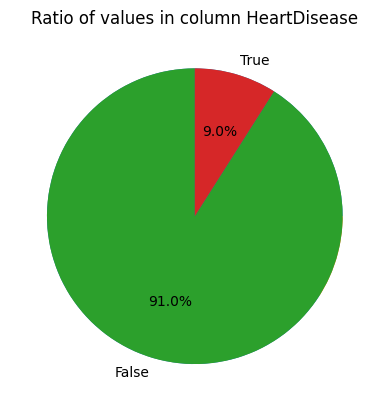

In [9]:
HeartDisease = df['HeartDisease'].value_counts().reset_index()
HeartDisease['ratio'] = round(HeartDisease['count'] / HeartDisease['count'].sum(),2)
plt.pie(HeartDisease['ratio'])
label = ['False', 'True']
plt.pie(HeartDisease['ratio'], labels= label, autopct='%1.1f%%', startangle=90)
plt.title('Ratio of values ​​in column HeartDisease')
plt.show()

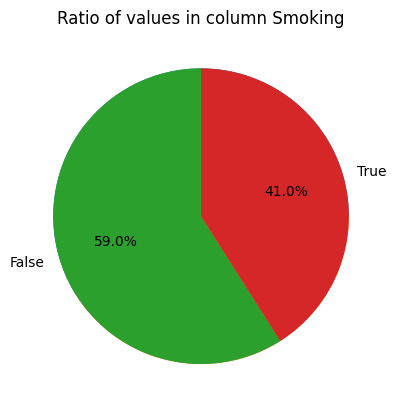

In [10]:
Smoking = df['Smoking'].value_counts().reset_index()
Smoking['ratio'] = round(Smoking['count'] / Smoking['count'].sum(),2)
plt.pie(Smoking['ratio'])
label = ['False', 'True']
plt.pie(Smoking['ratio'], labels= label, autopct='%1.1f%%', startangle=90)
plt.title('Ratio of values ​​in column Smoking')
plt.show()

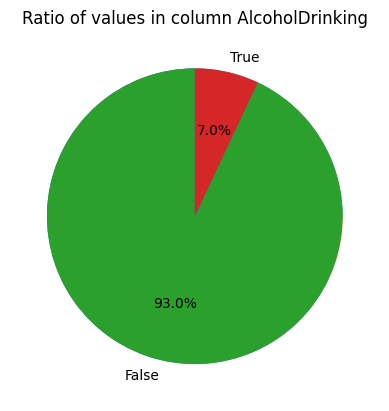

In [11]:
AlcoholDrinking = df['AlcoholDrinking'].value_counts().reset_index()
AlcoholDrinking['ratio'] = round(AlcoholDrinking['count'] / AlcoholDrinking['count'].sum(),2)
plt.pie(AlcoholDrinking['ratio'])
label = ['False', 'True']
plt.pie(AlcoholDrinking['ratio'], labels= label, autopct='%1.1f%%', startangle=90)
plt.title('Ratio of values ​​in column AlcoholDrinking')
plt.show()

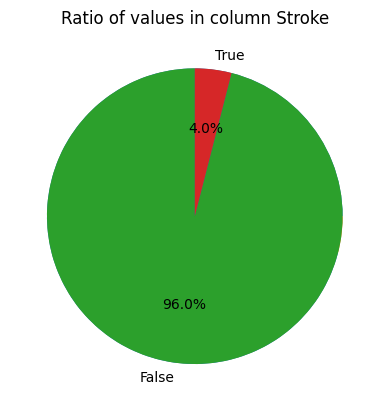

In [12]:
Stroke = df['Stroke'].value_counts().reset_index()
Stroke['ratio'] = round(Stroke['count'] / Stroke['count'].sum(),2)
plt.pie(Stroke['ratio'])
label = ['False', 'True']
plt.pie(Stroke['ratio'], labels= label, autopct='%1.1f%%', startangle=90)
plt.title('Ratio of values ​​in column Stroke')
plt.show()

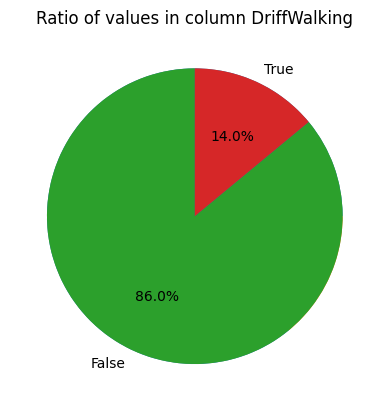

In [13]:
DiffWalking = df['DiffWalking'].value_counts().reset_index()
DiffWalking['ratio'] = round(DiffWalking['count'] / DiffWalking['count'].sum(),2)
plt.pie(DiffWalking['ratio'])
label = ['False', 'True']
plt.pie(DiffWalking['ratio'], labels= label, autopct='%1.1f%%', startangle=90)
plt.title('Ratio of values ​​in column DriffWalking')
plt.show()

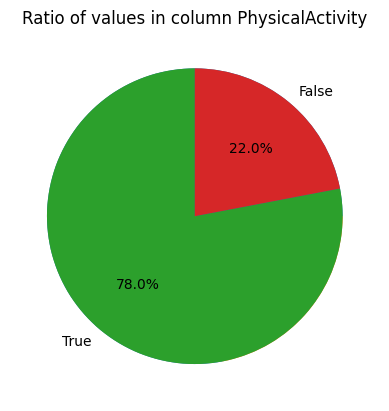

In [14]:
PhysicalActivity = df['PhysicalActivity'].value_counts().reset_index()
PhysicalActivity['ratio'] = round(PhysicalActivity['count'] / PhysicalActivity['count'].sum(),2)
plt.pie(PhysicalActivity['ratio'])
label = ['True', 'False']
plt.pie(PhysicalActivity['ratio'], labels= label, autopct='%1.1f%%', startangle=90)
plt.title('Ratio of values ​​in column PhysicalActivity')
plt.show()

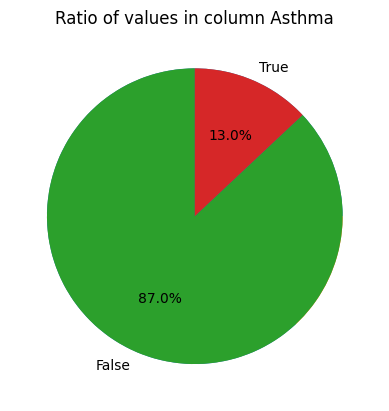

In [15]:
Asthma = df['Asthma'].value_counts().reset_index()
Asthma['ratio'] = round(Asthma['count'] / Asthma['count'].sum(),2)
plt.pie(Asthma['ratio'])
label = ['False', 'True']
plt.pie(Asthma['ratio'], labels= label, autopct='%1.1f%%', startangle=90)
plt.title('Ratio of values ​​in column Asthma')
plt.show()

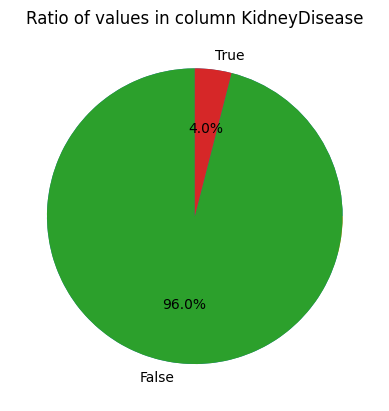

In [16]:
KidneyDisease = df['KidneyDisease'].value_counts().reset_index()
KidneyDisease['ratio'] = round(KidneyDisease['count'] / KidneyDisease['count'].sum(),2)
plt.pie(KidneyDisease['ratio'])
label = ['False', 'True']
plt.pie(KidneyDisease['ratio'], labels= label, autopct='%1.1f%%', startangle=90)
plt.title('Ratio of values ​​in column KidneyDisease')
plt.show()

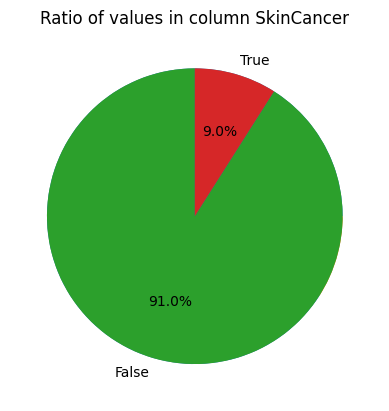

In [17]:
SkinCancer = df['SkinCancer'].value_counts().reset_index()
SkinCancer['ratio'] = round(SkinCancer['count'] / SkinCancer['count'].sum(),2)
plt.pie(SkinCancer['ratio'])
label = ['False', 'True']
plt.pie(SkinCancer['ratio'], labels= label, autopct='%1.1f%%', startangle=90)
plt.title('Ratio of values ​​in column SkinCancer')
plt.show()

---
### Xét các cột có kiểu float

`BMI`, `PhysicalHealth`, `MentalHealth`, `SleepTime`.

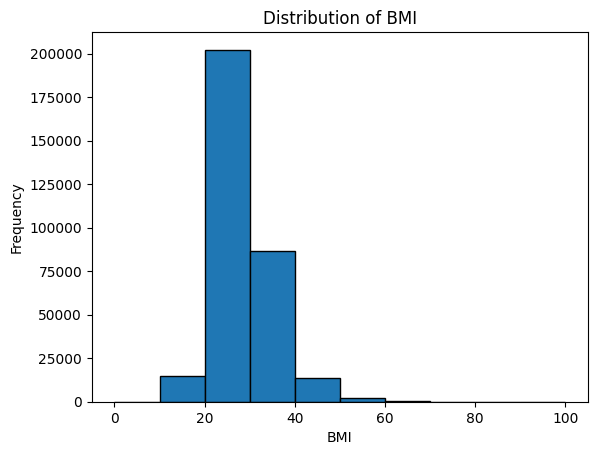

In [18]:
bins = range(0, 110, 10)
plt.hist(df['BMI'], bins=bins, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')
plt.show()

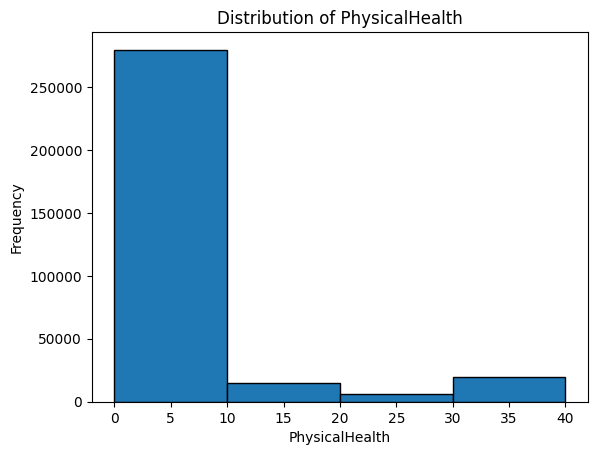

In [19]:
bins = range(0, 50, 10)
plt.hist(df['PhysicalHealth'], bins=bins, edgecolor='black')
plt.xlabel('PhysicalHealth')
plt.ylabel('Frequency')
plt.title('Distribution of PhysicalHealth')
plt.show()

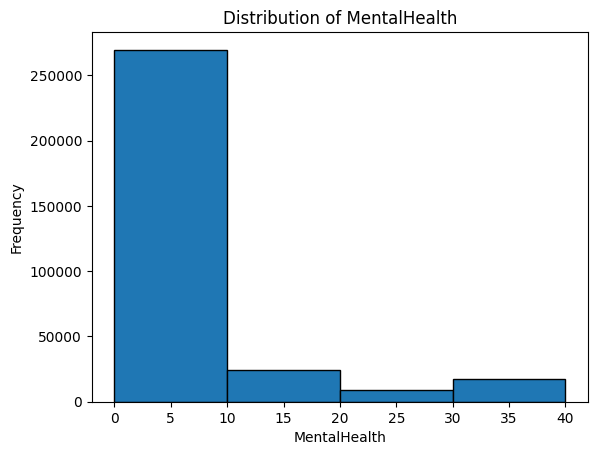

In [20]:
bins = range(0, 50, 10)
plt.hist(df['MentalHealth'], bins=bins, edgecolor='black')
plt.xlabel('MentalHealth')
plt.ylabel('Frequency')
plt.title('Distribution of MentalHealth')
plt.show()

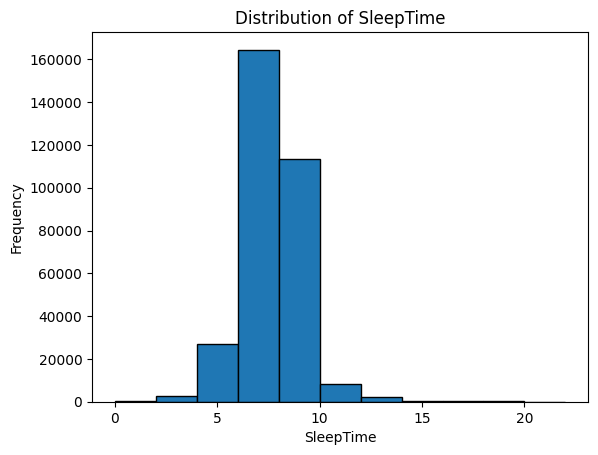

In [21]:
bins = range(0, 24, 2)
plt.hist(df['SleepTime'], bins=bins, edgecolor='black')
plt.xlabel('SleepTime')
plt.ylabel('Frequency')
plt.title('Distribution of SleepTime')
plt.show()

---
`AgeCategory`, `Race`, `Diabetic`, `GenHealth`

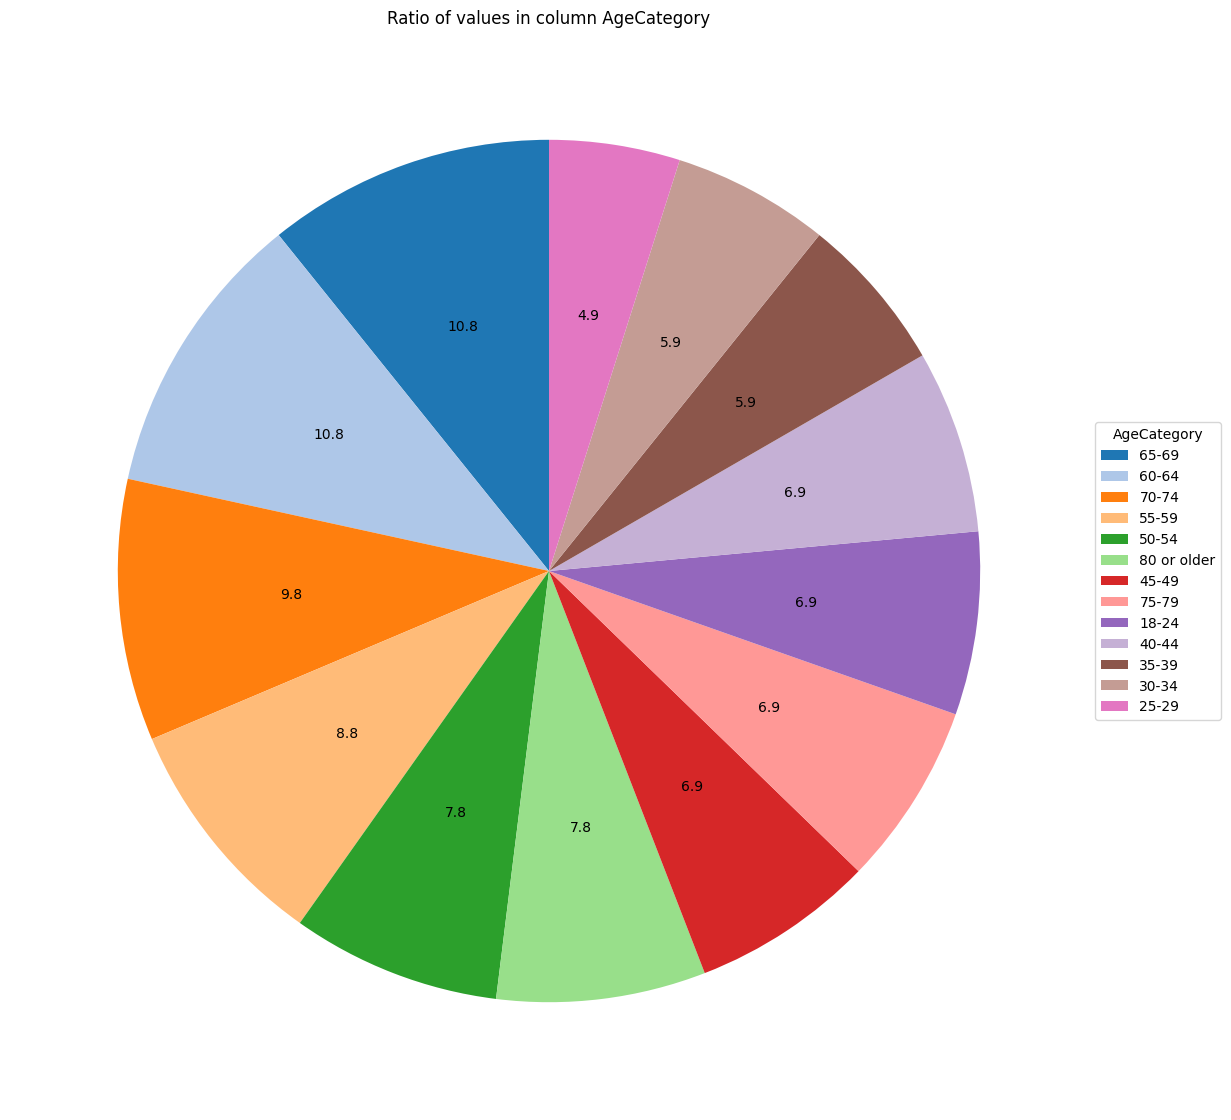

In [22]:
AgeCategory = df['AgeCategory'].value_counts().reset_index()
AgeCategory['ratio'] = round(AgeCategory['count'] / AgeCategory['count'].sum(),2)
plt.figure(figsize=(14,14))
wedges, texts, autotexts = plt.pie(
    AgeCategory['ratio'],
    autopct='%1.1f',
    startangle=90,
    colors=plt.cm.tab20.colors
)

plt.legend(
    wedges,
    AgeCategory['AgeCategory'],
    title="AgeCategory",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)
plt.title('Ratio of values ​​in column AgeCategory')
plt.show()

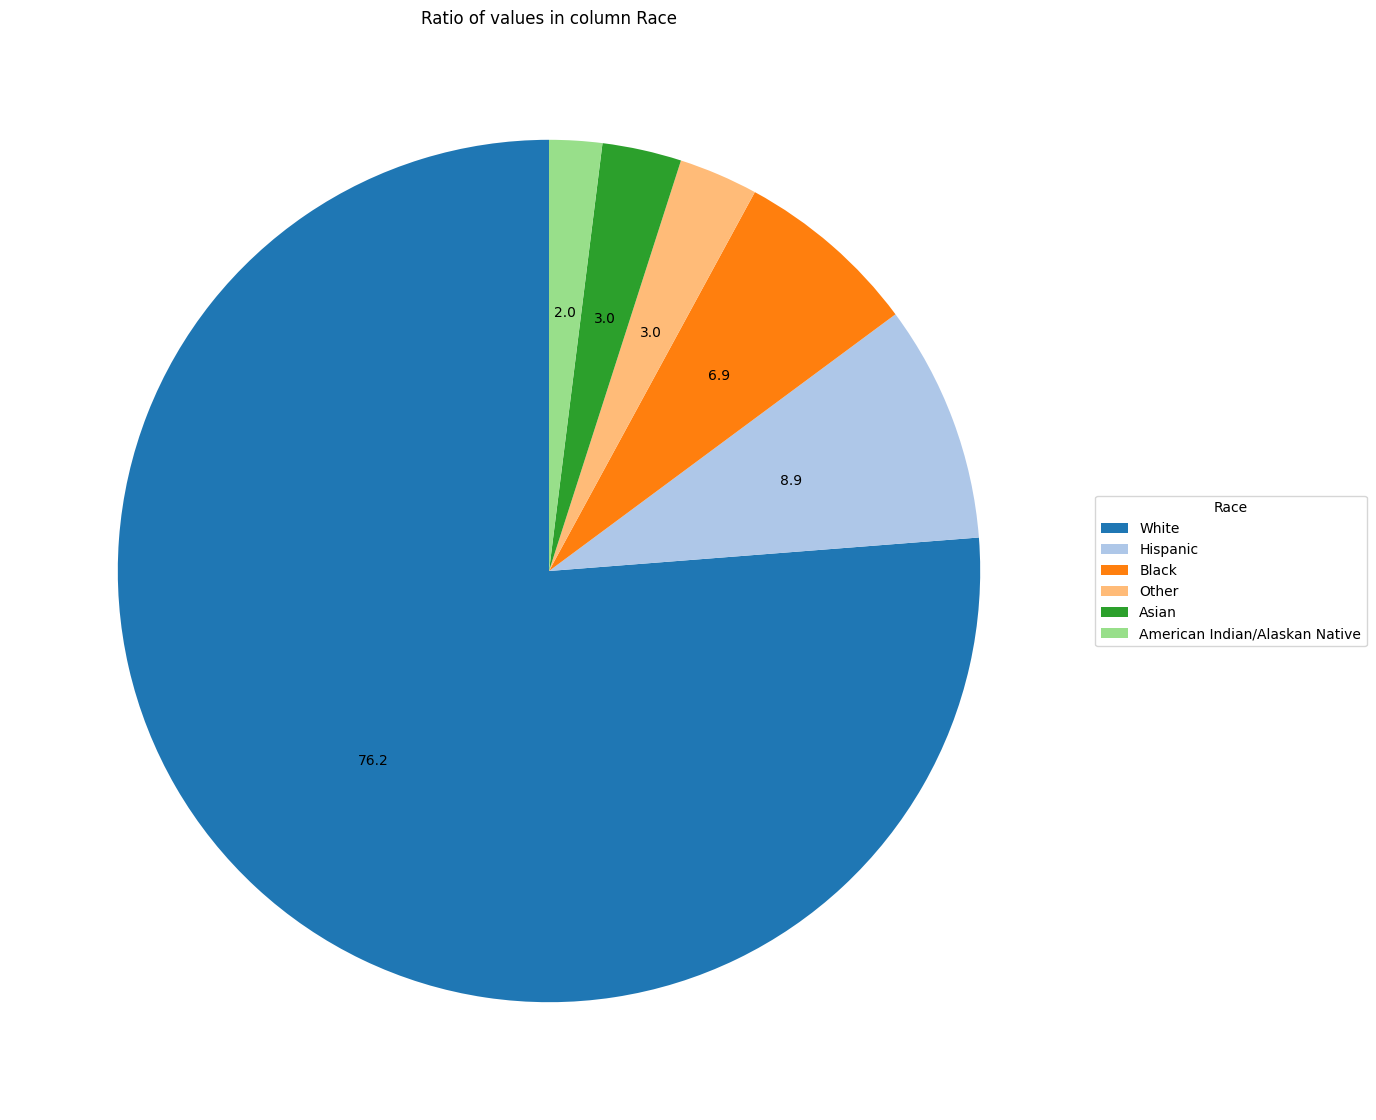

In [23]:
Race = df['Race'].value_counts().reset_index()
Race['ratio'] = round(Race['count'] / Race['count'].sum(),2)
plt.figure(figsize=(14,14))
wedges, texts, autotexts = plt.pie(
    Race['ratio'],
    autopct='%1.1f',
    startangle=90,
    colors=plt.cm.tab20.colors
)

plt.legend(
    wedges,
    Race['Race'],
    title="Race",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)
plt.title('Ratio of values ​​in column Race')
plt.show()

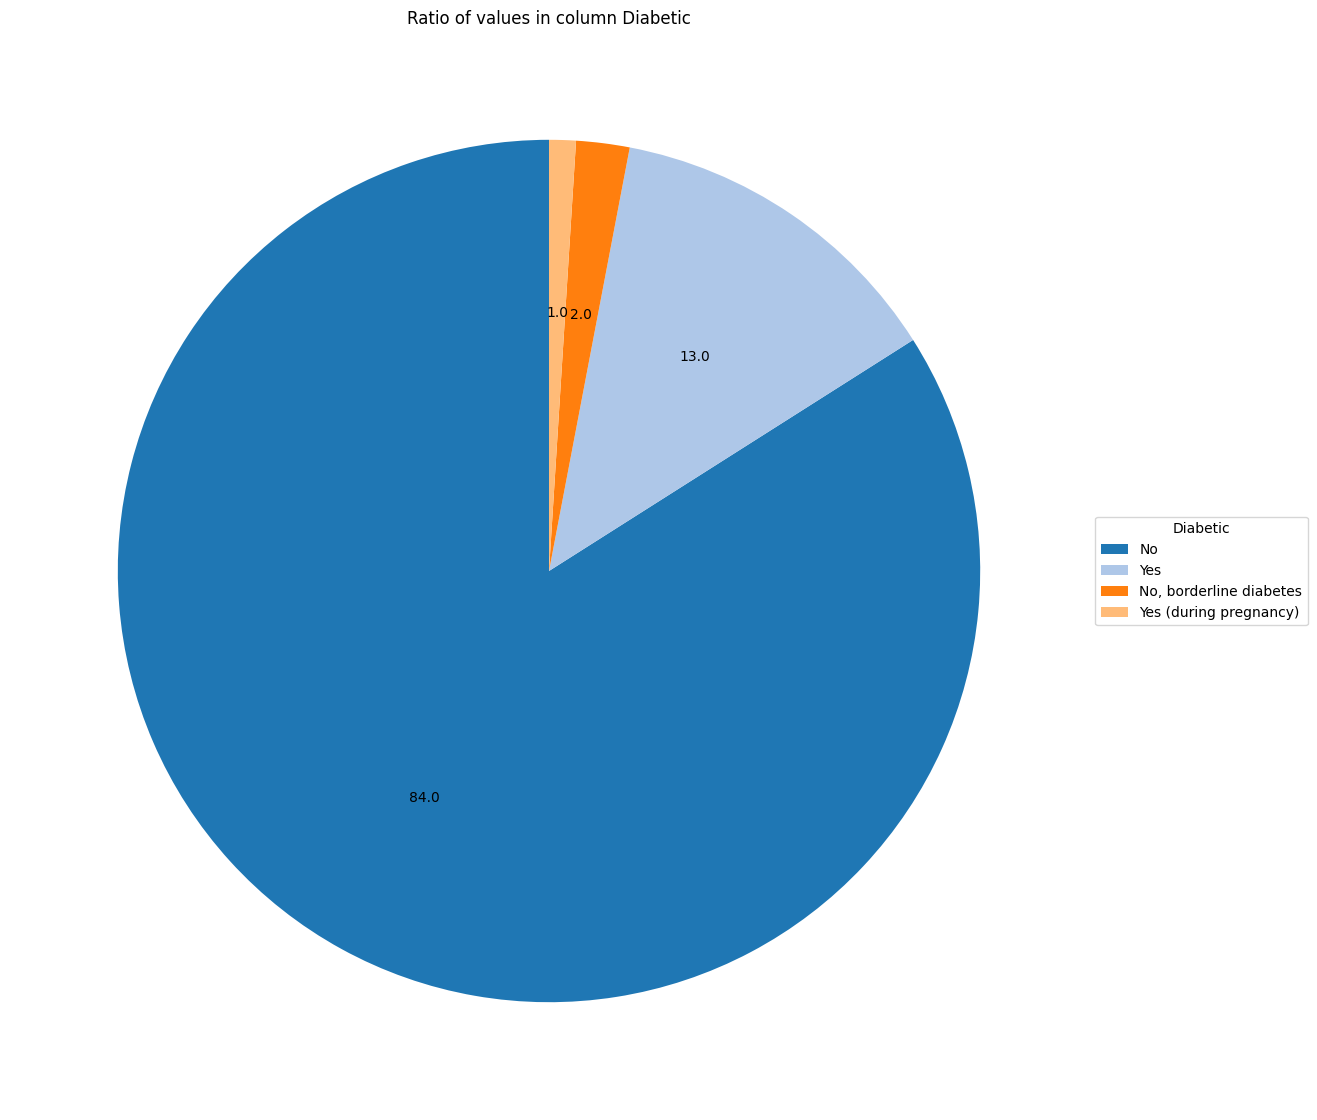

In [24]:
Diabetic = df['Diabetic'].value_counts().reset_index()
Diabetic['ratio'] = round(Diabetic['count'] / Diabetic['count'].sum(),2)
plt.figure(figsize=(14,14))
wedges, texts, autotexts = plt.pie(
    Diabetic['ratio'],
    autopct='%1.1f',
    startangle=90,
    colors=plt.cm.tab20.colors
)

plt.legend(
    wedges,
    Diabetic['Diabetic'],
    title="Diabetic",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)
plt.title('Ratio of values ​​in column Diabetic')
plt.show()

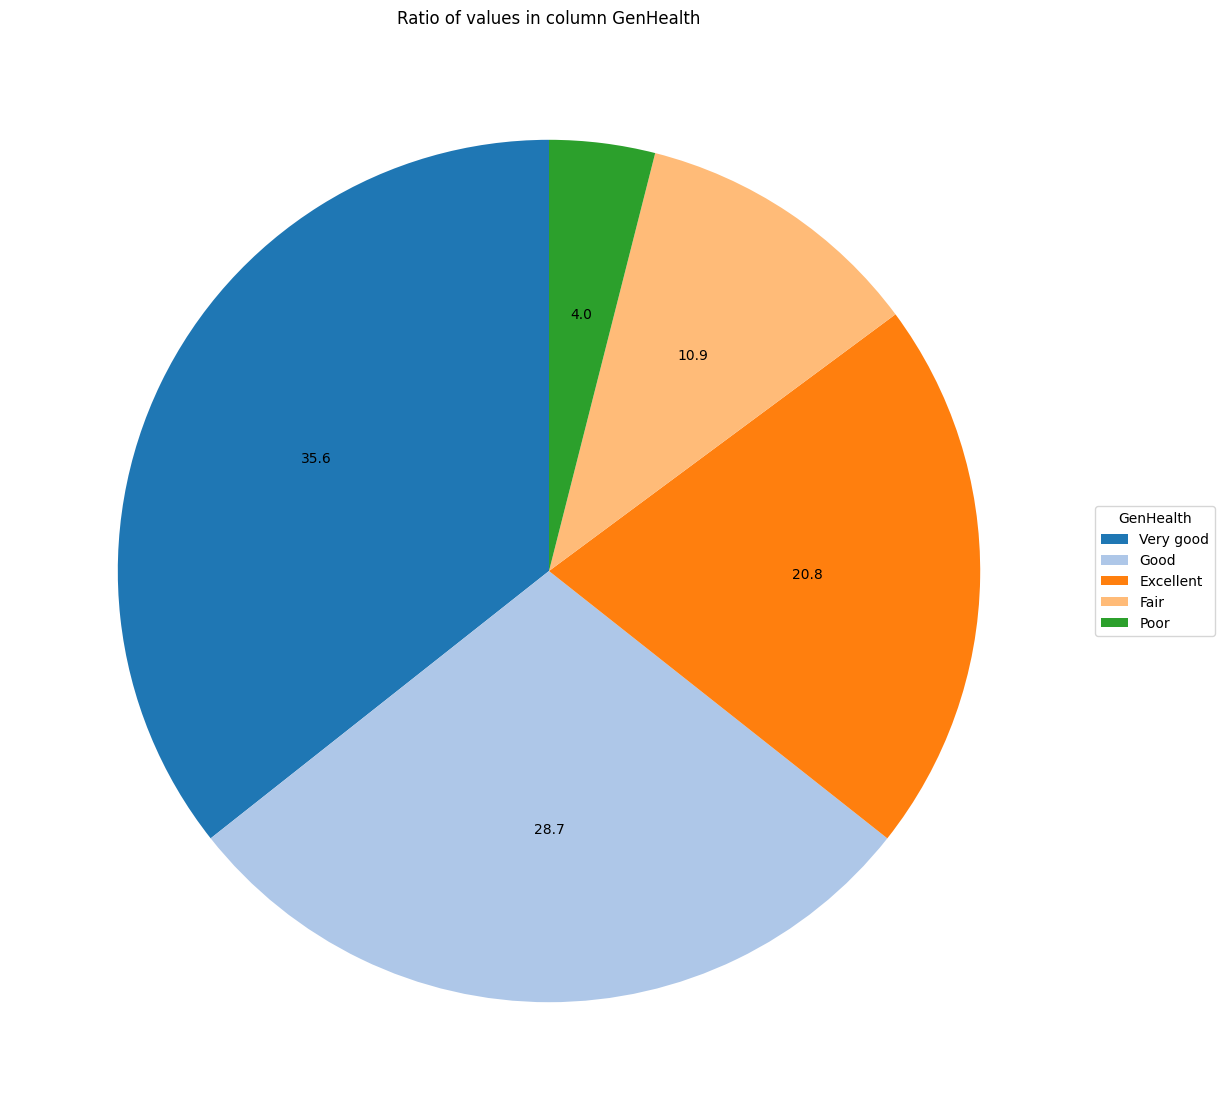

In [25]:
GenHealth = df['GenHealth'].value_counts().reset_index()
GenHealth['ratio'] = round(GenHealth['count'] / GenHealth['count'].sum(),2)
plt.figure(figsize=(14,14))
wedges, texts, autotexts = plt.pie(
    GenHealth['ratio'],
    autopct='%1.1f',
    startangle=90,
    colors=plt.cm.tab20.colors
)

plt.legend(
    wedges,
    GenHealth['GenHealth'],
    title="GenHealth",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)
plt.title('Ratio of values ​​in column GenHealth')
plt.show()

---
### Chuyển đổi dữ liệu từ kiểu category sang numeric để dễ dàng tính toán và xây dựng mô hình

In [26]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encode_meaning = {}
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])
    encode_meaning[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
        
print(df.head())

   HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0          30.0            0    0            7     5         2   
1           0.0            0    0           12     5         0   
2          30.0            0    1            9     5         2   
3           0.0            0    0           11     5         0   
4           0.0            1    0            4     5         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1          4        5.0       1              0   

### Ghi tập dữ liệu sau khi đã xử lý và tập định nghĩa sau khi đã thực hiện encode các catagories.

In [28]:
with open('Data/encode_meaning.txt', 'w') as f:
    for col, mapping in encode_meaning.items():
        f.write(f"Column: {col}\n")
        for key, value in mapping.items():
            f.write(f"  {key} : {value}\n")
        f.write("\n")

df.to_csv('Data/Heart_2020_Processed.csv')

---
Hoàn thành bước tiền xử lý